In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Part 1: Introduce the data, purpose and audience ###

 The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (output y).


Source: 

https://archive.ics.uci.edu/ml/datasets/bank+marketing


Additional machine learning study: 

http://www.columbia.edu/~jc4133/ADA-Project.pdf


The purpose of this project is to determine parameters that might affect the y output variable. Based on the information provided about the data set fields, the duration variable will be the main focus in that we will look at how changes in duration affect the final y output.

For this analysis, we will filter the data in the following ways:
1) Use first time calls in order to eliminate influences of past calls
2) Only use duration over the mean duration (257 s), assuming that this period of time is the most variable since it is more likely to go beyond scripted conversation.
3) Use campaigns that included more than 30 records in order to reduce the bias of the data.  Campaigns with fewer callers could be influenced by other factors. 


### Part 2: EDA ###



In [2]:
#Upload Data
#df = pd.read_csv("bank//bank.csv",delimiter=";")
df = pd.read_csv("bank//bank-additional.csv",delimiter=";")
#df= df_add

#df.shape,df_add.shape

In [3]:
#Sample of the data
pd.set_option('display.max_columns', None)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
#Dataframe dimensions
df.shape
#4119 records (random data sampled from larger dataset)
#21 columns

(4119, 21)

In [5]:
#Datatype of all fields
df.info()
# data type object mainly represents catagorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
# Statistics for numeric features
df.describe()

#Average age is 40
#Average duration is around 4 minutes (257 s)
#Over 75% of the calls by a given campagin for a given person was 3
#Min pday of 0 means that someone was called back on the same day


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Check for missing values
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Part 3: Data Cleaning/ Filtering / Transformation 

1) Find conversation that last more than average

2) Only focus on first time call success

3) Create categories by age

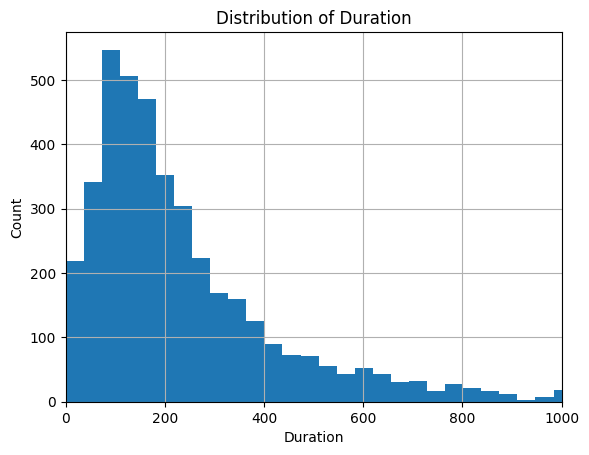

In [8]:
#df["age"].hist()
df["duration"].hist(bins=100)
plt.xlim(0,1000)
plt.title("Distribution of Duration")
plt.xlabel("Duration");
plt.ylabel("Count");



Mode is approx 100 secs

The mean (with outliers) is used because we want to consider whether extremely long calls are succesful. In other words, the study proposes that the longer the call, the more likely the customer will sign up for a term deposit.  Note: Outliers lie beyond the 1000 sec duration


In [9]:

#Create a mask to filter data rows
#set the duration to values greater that mean and to those individuals who were never contacted 
mask = (df.duration > df.duration.mean()) & (df.pdays == 999)



In [10]:
#Divide age (range = 70) into 7 groups
df["age_label"] = (df.age.values -18) // 10


1) Split data into records with yes target vs the total records

2) Look though all the columns of interest and print out the difference in perentage the counts for each each label.

    a. Percentages are calculated in order to normalize percent comparison)

    b. Positive values =  higher portion of group signifies "yes" outcome 





In [11]:

#df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
df_success = df[(df.y == "yes") & mask]
mask2 = ((df.duration > df.duration.mean())) & (df.pdays == 999)
df_control = df[mask2]




In [12]:
def plot_cat(cat):
    sns.boxplot( x=cat,y="duration",data=df_control);
    #sns.histplot(x="duration",data=df_control,hue=cat)
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();

In [13]:
#Function to calcualte the difference in percentages
def percent_diff(field):
    ctrl = df_control[field].value_counts(normalize=True).sort_values().to_frame()*100
    succ = df_success[field].value_counts(normalize=True).sort_values().to_frame()*100

    ctrl = ctrl.reset_index()
    succ = succ.reset_index()
    ctrl.columns = [field,"ctrl"]
    succ.columns = [field,"succ"]

    df_diff = ctrl.merge(succ, on=field)
    df_diff["diff"] = df_diff["succ"] - df_diff["ctrl"] 
    return df_diff


### Age

In [14]:

#Create intervals for the ages to use for plotting
ctrl = df_control["age_label"].value_counts(normalize=True).sort_values().to_frame()*100
succ = df_success["age_label"].value_counts(normalize=True).sort_values().to_frame()*100

ctrl = ctrl.reset_index()
succ = succ.reset_index()
ctrl.columns = ["age_group","ctrl"]
succ.columns = ["age_group","succ"]

df_control = df_control.reset_index(drop=True) 
df_control["age_max"] = (df_control["age_label"] + 1) *10 + 18
df_control["age_min"] = (df_control["age_label"]) *10 + 18

df_control["age_intervals"] = df_control.age_min.astype(str) + " to " + df_control.age_max.astype(str)
df_control



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_label,age_max,age_min,age_intervals
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,38,28,28 to 38
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,2,48,38,38 to 48
2,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,1,38,28,28 to 38
3,25,services,single,basic.6y,unknown,yes,no,cellular,jul,thu,301,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0,28,18,18 to 28
4,29,admin.,single,high.school,no,no,no,cellular,may,fri,553,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,38,28,28 to 38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,41,admin.,divorced,high.school,no,no,no,cellular,apr,fri,620,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no,2,48,38,38 to 48
1295,42,technician,divorced,professional.course,no,yes,no,cellular,aug,mon,408,1,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no,2,48,38,38 to 48
1296,63,retired,married,high.school,no,no,no,cellular,oct,wed,1386,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no,4,68,58,58 to 68
1297,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,463,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no,1,38,28,28 to 38


In [15]:
#Look at percentage differences between age groups

df_diff = ctrl.merge(succ, on="age_group")

df_diff["diff"] = df_diff["succ"] - df_diff["ctrl"] 
df_diff["age_max"] = (df_diff["age_group"] + 1) *10 + 18
df_diff["age_min"] = (df_diff["age_group"]) *10 + 18
df_diff.sort_values(by="age_group")




,age_group,ctrl,succ,diff,age_max,age_min
3,0,6.928406,6.137184,-0.791222,28,18
6,1,39.107005,37.906137,-1.200868,38,28
5,2,28.714396,23.826715,-4.887681,48,38
4,3,19.861432,21.299639,1.438207,58,48
2,4,4.234026,7.942238,3.708212,68,58
1,5,0.615858,1.083032,0.467174,78,68
0,6,0.538876,1.805054,1.266178,88,78


First calls made to those under the age of 48 were less successful. This could be because younger people were less available to take a phone call.



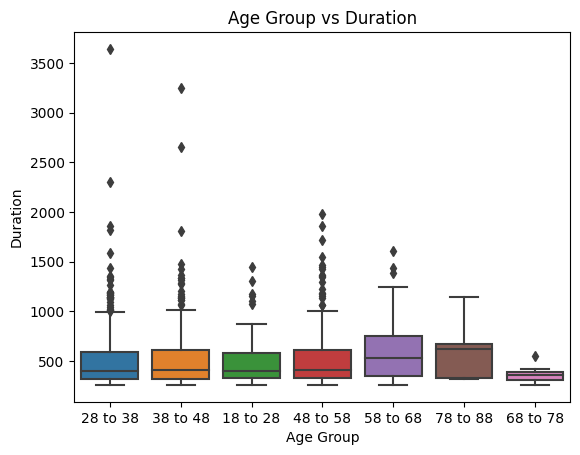

In [16]:
#Plot the age groups by duration
sns.boxplot( x="age_intervals",y="duration",data=df_control);
plt.title("Age Group vs Duration")
#plt.xticks(ticks =[0,1,2,3,4,5,6], labels= x_labels, rotation = 90);
plt.xlabel("Age Group")
plt.ylabel("Duration")
plt.show();
#plot_cat("age_label")

### Contact

In [17]:

percent_diff("contact")


,contact,ctrl,succ,diff
0,telephone,34.795997,22.021661,-12.774336
1,cellular,65.204003,77.978339,12.774336


Cellular outcomes were much better than telephone

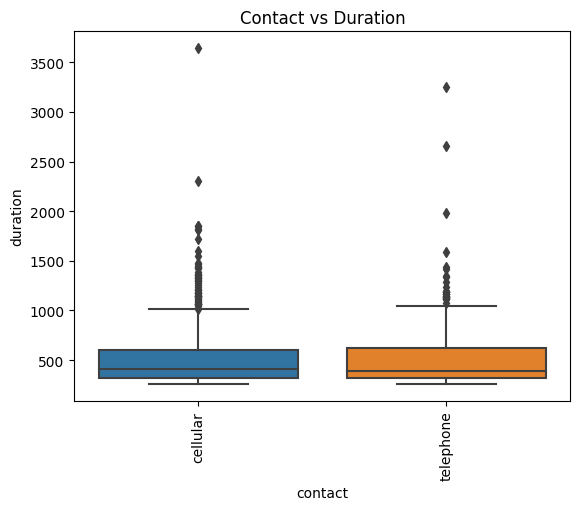

In [18]:
plot_cat("contact")

### Month

In [19]:

percent_diff("month")

,month,ctrl,succ,diff
0,dec,0.615858,1.805054,1.189196
1,mar,0.692841,2.166065,1.473224
2,oct,1.308699,3.249097,1.940398
3,sep,1.462664,2.527076,1.064412
4,apr,6.620477,9.025271,2.404793
5,nov,9.314858,7.581227,-1.733630
6,aug,12.163202,12.274368,0.111166
7,jun,12.471132,16.967509,4.496377
8,jul,19.014627,18.050542,-0.964085
9,may,36.335643,26.353791,-9.981852


November, July, and May were the least successful months.

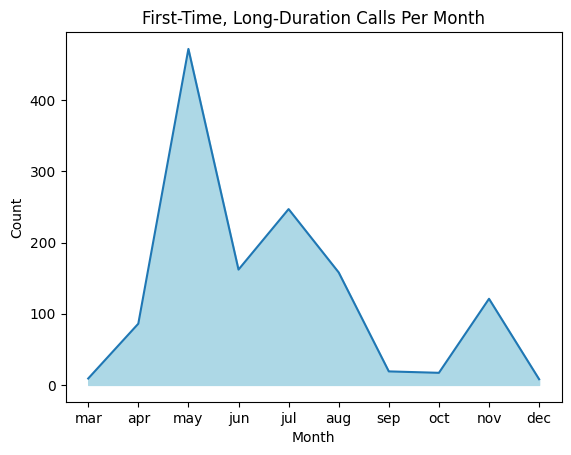

In [20]:

df_control
df_month_counts = df_control.month.value_counts().reset_index()
df_month_counts.columns = ["Month","Count"] 
df_month_counts["month_num"] = [5,7,6,8,11,4,9,10,3,12]
df_month_counts = df_month_counts.sort_values(by="month_num")
sns.lineplot(data=df_month_counts, x="Month", y="Count")
plt.title("First-Time, Long-Duration Calls Per Month");
plt.fill_between(df_month_counts.Month.values, df_month_counts.Count.values,color="lightblue");



The low success rate could be due to the high number (peaks) of calls in November, July, and May

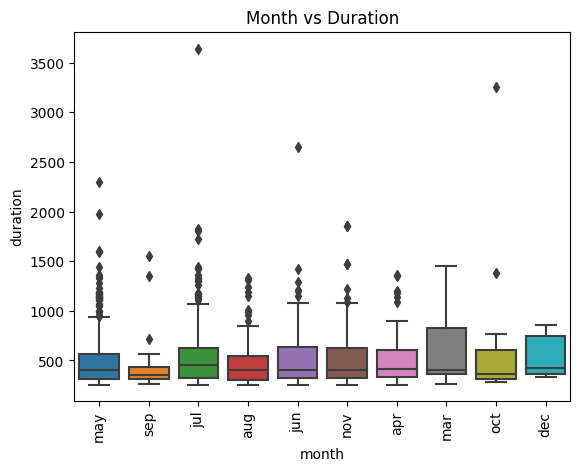

In [21]:
plot_cat("month")

July median is higher than most

### Education

In [22]:
percent_diff("education")


,education,ctrl,succ,diff
0,unknown,4.541955,4.693141,0.151185
1,basic.6y,6.543495,4.693141,-1.850354
2,basic.4y,10.469592,10.830325,0.360733
3,professional.course,13.548884,13.718412,0.169528
4,basic.9y,13.779831,11.913357,-1.866473
5,high.school,22.478830,21.660650,-0.818180
6,university.degree,28.637413,32.490975,3.853561


First-time, Long-duration calls to those with a university degree was by far the most successful

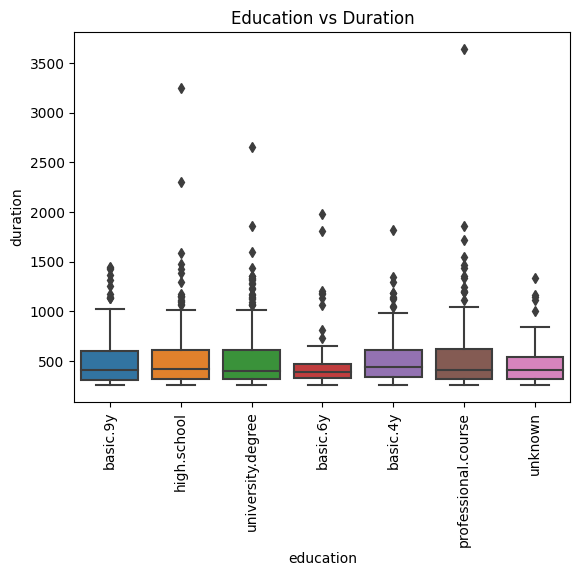

In [23]:
plot_cat("education")

#Basic.6y has a lower median

### Loan

In [24]:
percent_diff("loan")


,loan,ctrl,succ,diff
0,unknown,2.463433,1.805054,-0.658379
1,yes,14.472671,15.523466,1.050794
2,no,83.063895,82.671480,-0.392415


Calls to those with a personal loan were signficanty successful. It is possible that those who have a personal loan are more likely to have said yea to a markeing campaign in the past.

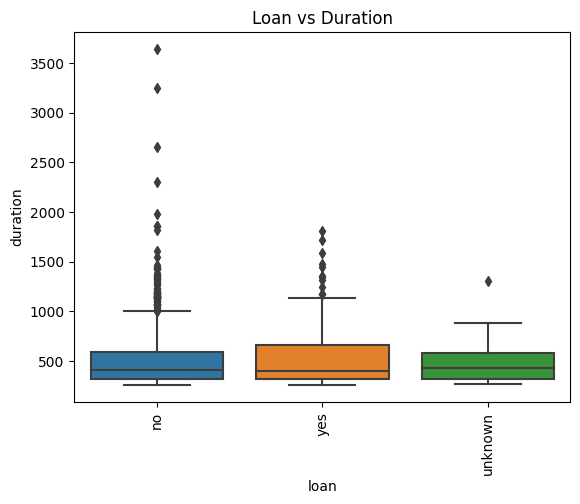

In [25]:
plot_cat("loan")

### Marital Status

In [26]:
percent_diff("marital")
 

,marital,ctrl,succ,diff
0,unknown,0.384911,0.361011,-0.023901
1,divorced,11.085450,11.191336,0.105885
2,single,26.866821,31.407942,4.541122
3,married,61.662818,57.039711,-4.623106


Calls to single individuals was 4.54% more succesful and those to marries individauals was %4.62 less successful.

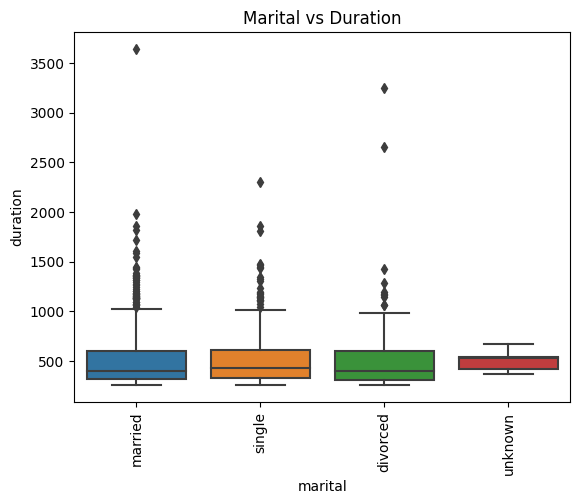

In [27]:
plot_cat("marital")

### Job

In [28]:

percent_diff("job")

,job,ctrl,succ,diff
0,unknown,0.846805,0.722022,-0.124784
1,student,2.155504,3.249097,1.093593
2,housemaid,2.386451,2.527076,0.140625
3,unemployed,3.156274,3.971119,0.814845
4,entrepreneur,3.310239,2.888087,-0.422152
5,self-employed,3.541186,2.888087,-0.653099
6,retired,4.541955,6.498195,1.956240
7,management,8.237105,6.498195,-1.738911
8,services,9.468822,8.303249,-1.165573
9,technician,16.012317,17.689531,1.677214


Individauls who work as admin jobs or who are retired seem most likely to say yes and blue_collar workers are least likely

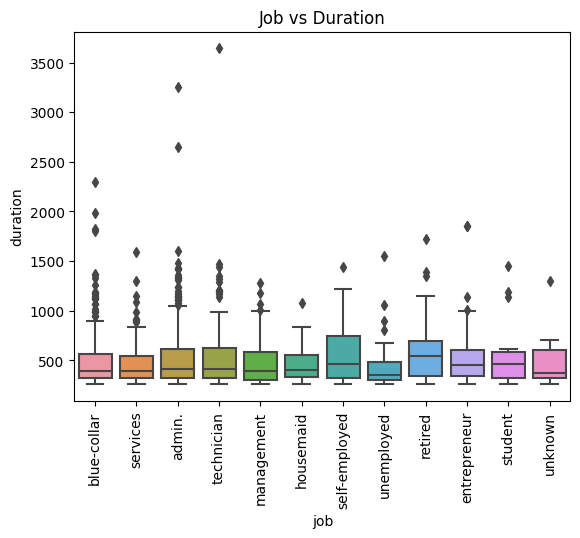

In [29]:
plot_cat("job")
 

### Housing

In [30]:
percent_diff("housing")


,housing,ctrl,succ,diff
0,unknown,2.463433,1.805054,-0.658379
1,no,46.497306,47.653430,1.156124
2,yes,51.039261,50.541516,-0.497745


Those without mortgage are more likely to say yes.

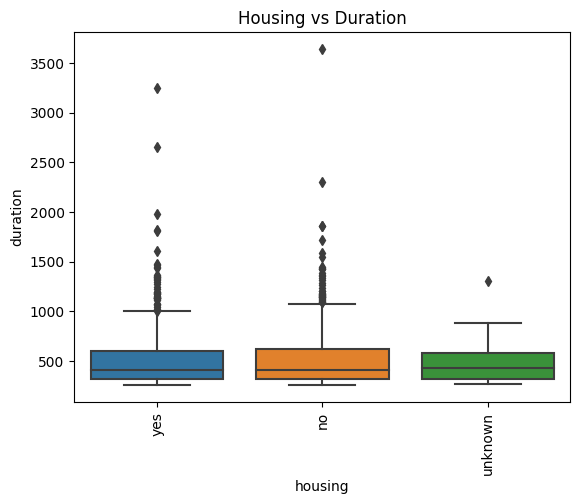

In [31]:
plot_cat("housing")

### Default

In [32]:
percent_diff("default")

,default,ctrl,succ,diff
0,unknown,20.862202,15.884477,-4.977725
1,no,79.137798,84.115523,4.977725


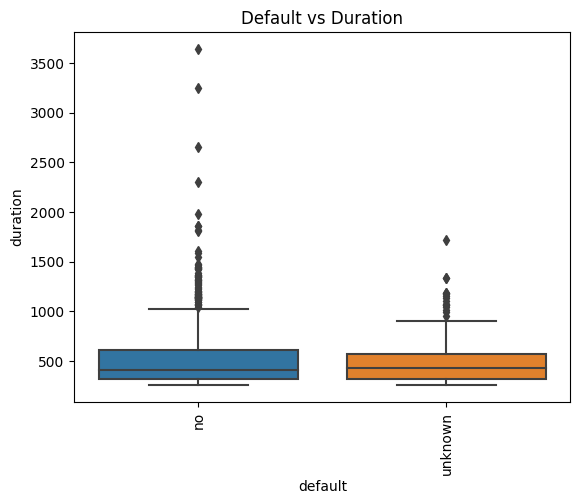

In [33]:
plot_cat("default")

In [34]:
df[df["default"] == "yes"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_label
3514,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,111,2,999,1,failure,-0.1,93.2,-42.0,4.153,5195.8,no,1


Only one record with a "default" field value of "yes" in the full dataset

### Conclusion

Create a subset of callers that fit criteria for successful calls based on percentage difference

In [35]:

mask2 = (df_control.age > 48) & (df_control.contact == "cellular") & (df_control.loan == "yes") & (df_control.housing == "no") 



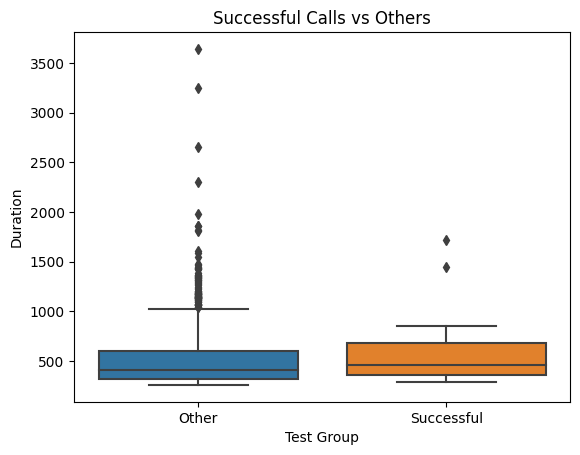

In [36]:
#Show boxplot
df_control["test_group"] = "Other"
df_control.loc[mask2,"test_group"] = "Successful"
sns.boxplot(data=df_control,x="test_group",y="duration");
plt.xlabel("Test Group")
plt.ylabel("Duration");
plt.title("Successful Calls vs Others");

Succesful calls show a higher median and lower range

In [37]:
#Show actual mean and median values
d={}
d["duration"] = ["median","mean"]
df_control.groupby("test_group").agg(d)

duration            
             median        mean
test_group                     
Other         406.0  508.927570
Successful    461.0  624.133333

Successful test group has a higher median (461 > 406), but even higher mean (624.1 > 509)

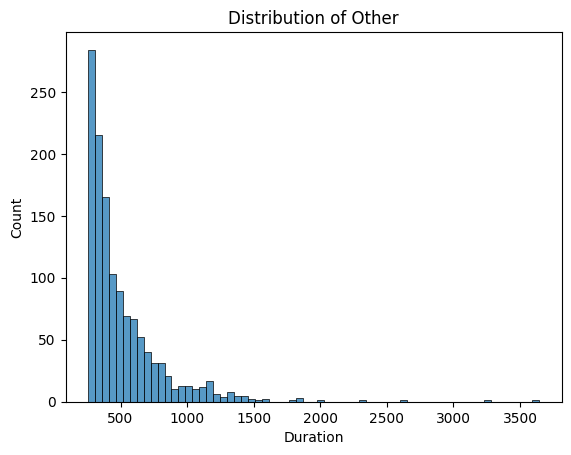

In [38]:
#Distribution of number of calls by duration for Other
sns.histplot(data=df_control[df_control.test_group == "Other"],x="duration")
plt.title("Distribution of Other")
plt.xlabel("Duration");

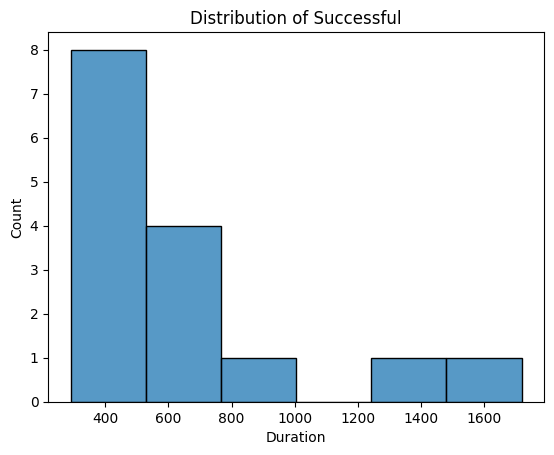

In [39]:
#Distribution of number of calls by duration for Successful
sns.histplot(data=df_control[df_control.test_group == "Successful"],x="duration");
plt.title("Distribution of Successful")
plt.xlabel("Duration");